**Motivation:** I have selected this dataset because i want to learn more about the hotel industry, and devolep a model that can accuretly predict whether a customer will cancel their reservation or not. bt predicting which customers will cancel, hotels will be able to save money. 

**Objective:** to Build a model that can accuretly predicte (classify) if a costumer will cancel their hotel reservation or not.

**Abbroach:** use machine learning algorithems to train a model on a decently sized Dataset, then test the model's preformance using a testing data set to calculate the model's accurecy

**Description:** The data set contains 36275 bookings, with 18 features.

**Visualization and analysis:**

In [180]:
import os
import cv2
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

data = pd.read_csv("/content/Hotel Reservations.csv")

print("data Type: " + str(type(data)))
print("data shape Type: " + str(type(data.shape)))
print("data shape: " + str(data.shape))

data Type: <class 'pandas.core.frame.DataFrame'>
data shape Type: <class 'tuple'>
data shape: (36275, 19)


In [181]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [182]:
data.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [183]:
#the features
print(data.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


Features:

**Booking_ID:** unique identifier of each booking

**no_of_adults:** Number of adults

**no_of_children:** Number of Children

**no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**no_of_week_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**type_of_meal_plan:** Type of meal plan booked by the customer

**required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)

**room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

**lead_time:** Number of days between the date of booking and the arrival date

**arrival_year:** Year of arrival date

**arrival_month:** Month of arrival date

**arrival_date:** Date of the month

**market_segment_type:** Market segment designation.

**repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)

**no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking

**no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking

**avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

**no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)


Response:

**booking_status:** Flag indicating if the booking was canceled or not.

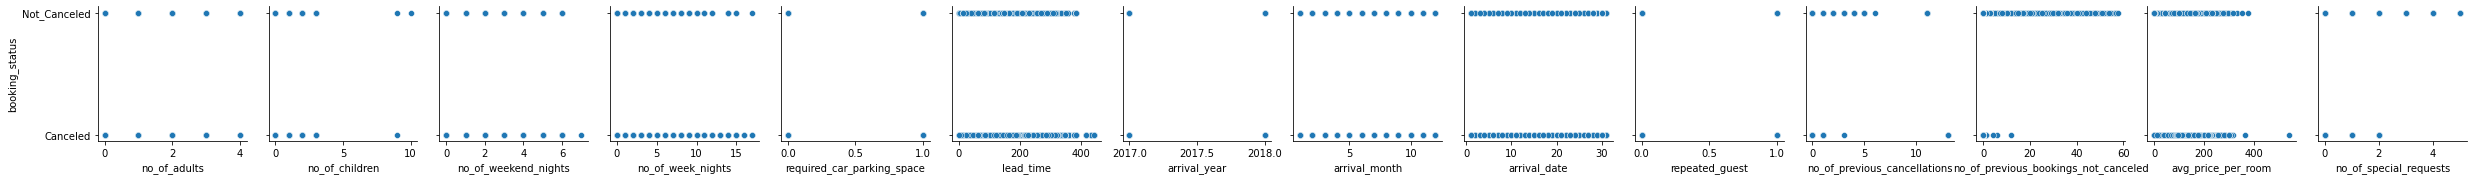

In [184]:
# visualize the relationship between the features and the response using scatterplots

sns.pairplot(data, y_vars = 'booking_status')

<AxesSubplot:title={'center':'Booking Status'}, xlabel='booking_status', ylabel='count'>

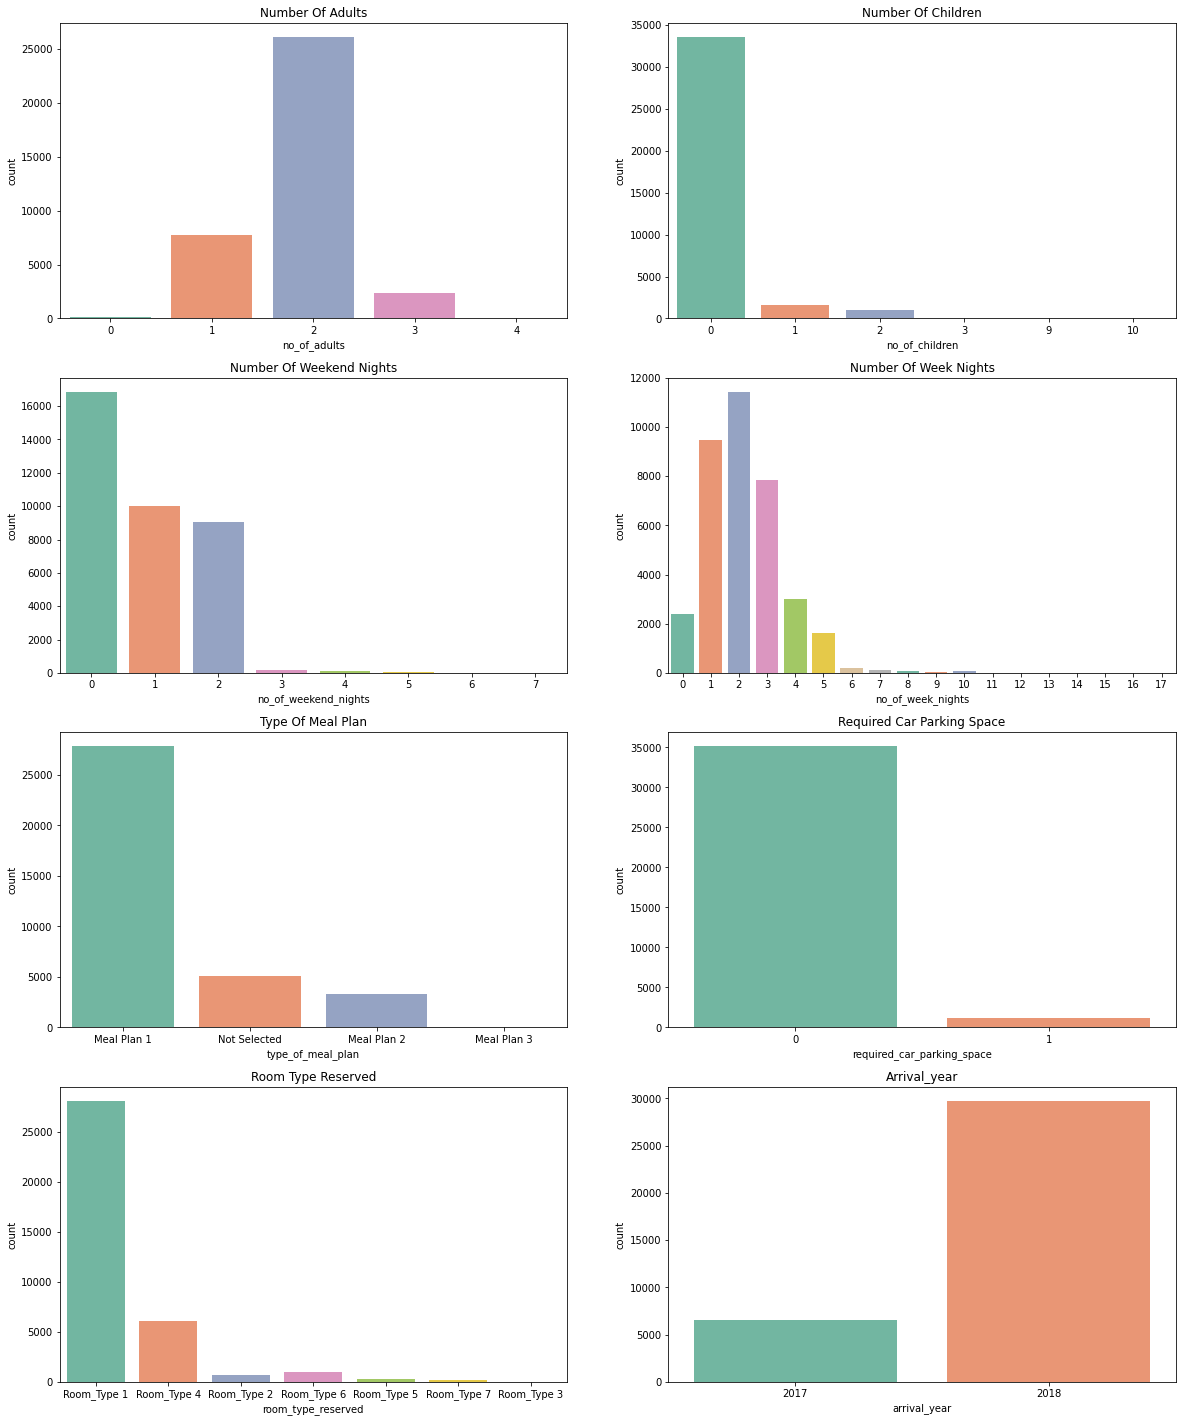

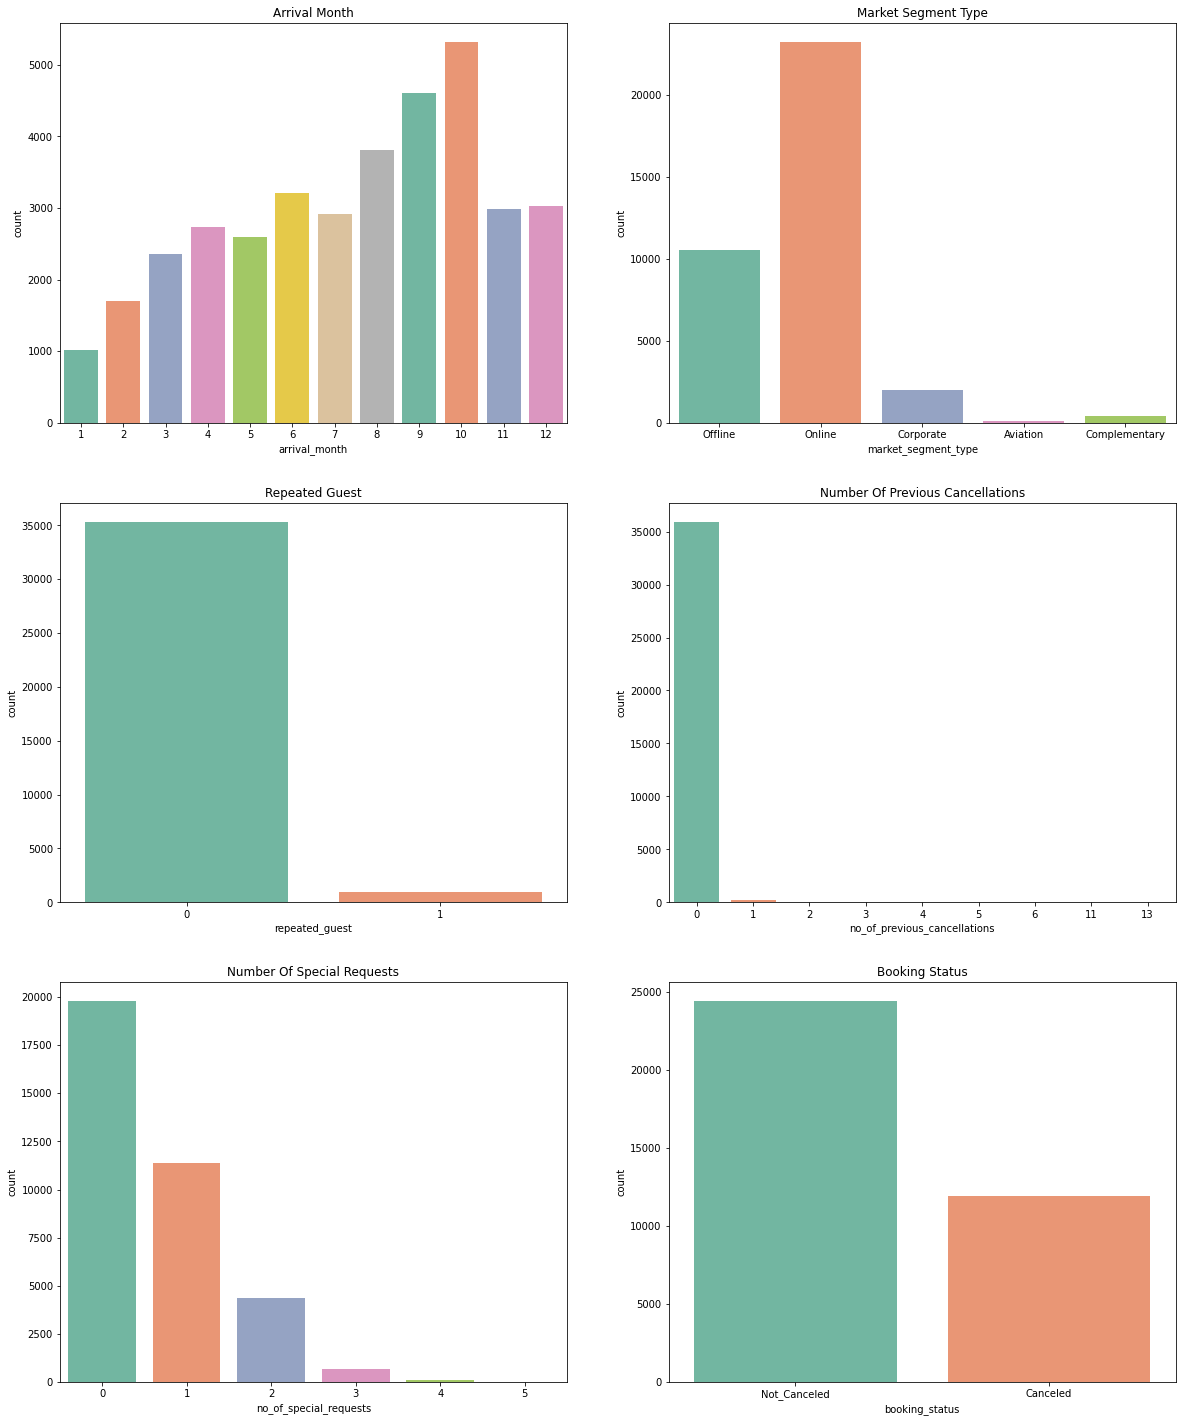

In [185]:
# visualize the number of indivisuals vs where they fit in each feature
plt.figure(figsize = (20,25))
plt.subplot(4,2,1)
plt.gca().set_title('Number Of Adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = data)

plt.subplot(4,2,2)
plt.gca().set_title('Number Of Children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = data)

plt.subplot(4,2,3)
plt.gca().set_title('Number Of Weekend Nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = data)

plt.subplot(4,2,4)
plt.gca().set_title('Number Of Week Nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = data)

plt.subplot(4,2,5)
plt.gca().set_title('Type Of Meal Plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = data)

plt.subplot(4,2,6)
plt.gca().set_title('Required Car Parking Space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = data)

plt.subplot(4,2,7)
plt.gca().set_title('Room Type Reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = data)

plt.subplot(4,2,8)
plt.gca().set_title('Arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = data)

plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Arrival Month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = data)

plt.subplot(3,2,2)
plt.gca().set_title('Market Segment Type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = data)

plt.subplot(3,2,3)
plt.gca().set_title('Repeated Guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = data)

plt.subplot(3,2,4)
plt.gca().set_title('Number Of Previous Cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set2', data = data)

plt.subplot(3,2,5)
plt.gca().set_title('Number Of Special Requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set2', data = data)

plt.subplot(3,2,6)
plt.gca().set_title('Booking Status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = data)

We need to change the features that have test to be represented as numerical value.

In [186]:
label_segment = LabelEncoder()
label_status = LabelEncoder()
label_meal_plan = LabelEncoder()
label_reserved = LabelEncoder()

data['booking_status'] = label_status.fit_transform(data['booking_status'])
data['type_of_meal_plan'] = label_meal_plan.fit_transform(data['type_of_meal_plan'])
data['market_segment_type'] = label_segment.fit_transform(data['market_segment_type'])
data['room_type_reserved'] = label_reserved.fit_transform(data['room_type_reserved'])

name_mapping = dict(zip(label_status.classes_, label_status.transform(label_status.classes_)))
print(name_mapping)

{'Canceled': 0, 'Not_Canceled': 1}


In [187]:
#remove the booking ID (not needed)
data = data.drop('Booking_ID', axis = 1)

#remove the booking status (the variable we are trying to predict)
X = data.drop('booking_status', axis = 1)

#The Goal (prediction)
y = data['booking_status']

In [188]:
#splitting the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(29020, 17)
(7255, 17)
(29020,)
(7255,)


**KNN model:**

In [189]:
# try with k = 3
k = 3

#to ensure the same results 
np.random.seed(40)

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#the accurecy
print("Accuracy of the KNN predictor with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the KNN predictor with k=3: 0.8046864231564438


let's try to plot the accurecy for k = 1 to k = 30, to try and visualize the best k to choose.

In [190]:
k_range = range(1, 30)

scores = []

# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8114403859407305, 0.760303239145417, 0.8046864231564438, 0.7816678152997932, 0.8063404548587181, 0.791592005513439, 0.8077188146106133, 0.7953135768435562, 0.8038594073053067, 0.7946243969676086, 0.8001378359751895, 0.7953135768435562, 0.8031702274293591, 0.7988973121984838, 0.8044107512060648, 0.7993108201240524, 0.8001378359751895, 0.7961405926946933, 0.8005513439007581, 0.7975189524465885, 0.7995864920744314, 0.7950379048931772, 0.7946243969676086, 0.7936595451412819, 0.7931082012405237, 0.7924190213645762, 0.7950379048931772, 0.791592005513439, 0.7909028256374914]


Text(0, 0.5, 'Testing Accuracy')

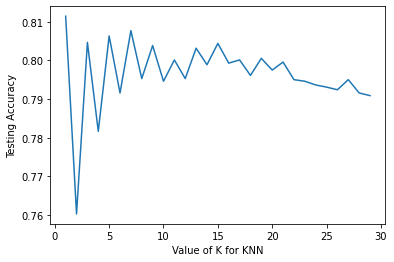

In [191]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

The plot shows that the accuracy appears to be changing rapidly as k changes. But there is a maximum at k = 1


let's do it again using Cross-Validation

In [192]:
cross_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_scores.append(scores.mean())
print(cross_scores)


[0.8099241902136459, 0.7648518263266713, 0.8061681598897312, 0.7854927636113025, 0.8057546519641626, 0.791040661612681, 0.8037904893177119, 0.794486560992419, 0.8038249483115093, 0.7971743625086148, 0.8042039972432805, 0.7998621640248105, 0.8041695382494831, 0.8002412129565816, 0.8036871123363196, 0.7988628532046864, 0.8012405237767057, 0.7987939352170917, 0.8010682288077188, 0.7975189524465887, 0.7991729841488628, 0.7957960027567196, 0.7966919365954513, 0.7944176430048243, 0.7955892487939352, 0.7940041350792557, 0.795382494831151, 0.793590627153687, 0.7952446588559614]


Text(0, 0.5, 'Cross-Validated Accuracy')

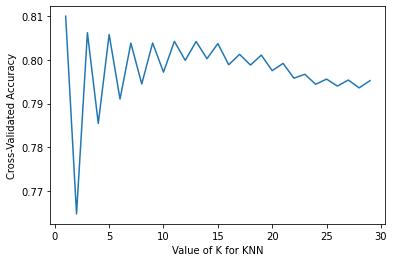

In [193]:
plt.plot(k_range, cross_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

the train-test split produces a slightly better results (0.001), and it is much faster. so i will be using train-split split with k = 1.

even though the result diffrence is small, it may indicate overfitting. So, i will be preforming feature Selection and OverSampling

In [194]:
#test the accuracy for k = 1
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#the accurecy
print("Accuracy of the KNN predictor with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the KNN predictor with k=1: 0.8114403859407305


After Asking ChatGPT a few questions (can be found at the end), i have decided to OverSample the minority class (canceled reservations) to help the model make non biased and accurate decisions. And to do it after feature selection

But first we need to scale the features in out data

In [195]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

In [196]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#the accurecy
print("Accuracy of the KNN predictor after scalling with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the KNN predictor after scalling with k=1: 0.8412129565816678


next, we will try doing featureSelection

In [197]:
print("The data set Originaly contains " + str(X.shape[1]) + " dimensions.")

clf = DecisionTreeClassifier(random_state = 40)
clf.fit(X_scaled, y)

trans = SelectFromModel(clf, threshold='median')
X_trans = trans.fit_transform(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=4)


print("now the data set contains " + str(X_trans.shape[1]) + " dimensions.")

The data set Originaly contains 17 dimensions.
now the data set contains 9 dimensions.


In [198]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#the accurecy
print("Accuracy of the KNN predictor after feature selection with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the KNN predictor after feature selection with k=1: 0.8398345968297726


Now, try PCA to see if it gives a better result

In [199]:
# Instantiate
pca = PCA(n_components=2,random_state = 40)

# Fit and Apply dimensionality reduction on X
Z = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=4)

In [200]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#the accurecy
print("Accuracy of the PCA KNN predictor with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the PCA KNN predictor with k=1: 0.7671950379048932


feature selection increases the accuracy of the model by 0.028, while PCA decreased the accuracy. as a result, i will be using the feature selected data to oversample.

Now we will try to OverSample the minority class (Canceled reservations)

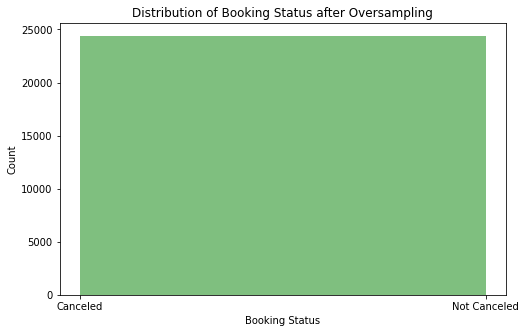

In [201]:
#overSampling
oversampler = RandomOverSampler(random_state=40)

X, y = oversampler.fit_resample(X_trans, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


#plot it after OverSampling
plt.figure(figsize=(8, 5))
plt.hist(y, bins=2, color='green', alpha=0.5)
plt.title('Distribution of Booking Status after Oversampling')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Canceled', 'Not Canceled'])
plt.show()

In [202]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#the accurecy
print("Accuracy of the oversampled KNN predictor with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the oversampled KNN predictor with k=1: 0.9093890938909389


oversampling shows a 0.069 improvment in accuracy.

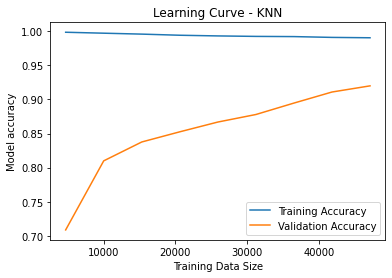

In [203]:
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=30, train_sizes = np.linspace(0.1, 1.0, 9),random_state = 40)

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean, label='Training Accuracy')
plt.plot(train_sizes,test_mean, label='Validation Accuracy')
plt.title('Learning Curve - KNN')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.legend(loc='lower right')
plt.show()

The learning curve shows that the model might be overfitting since the training accuracy stayed very close to 1. which indicates that the model is learning the noise in the data rather than ignoring them.

[[4508  291]
 [ 593 4364]]


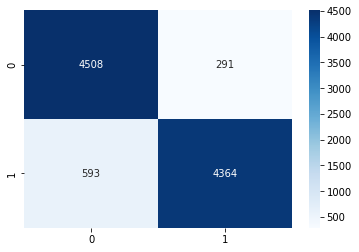

In [204]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
print(cm)

The confusion matrix shows:
- True Negative is 4508
- True Positive is 4364
- False Positives is 291
- False Negatives is 593

it shows that the model is more likely to wrongfuly predict the reservations that will be Canceled (predict them as non-canceled) rather than the ones that will not be canceled (predicting them as canceled)

---

**KNN final accuracy is 90.93%**



---

**Logistic Regression:Model**

In [205]:
#reset the X and y sets
X = data.drop('booking_status', axis = 1)

#The Goal (prediction)
y = data['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [206]:
logreg = LogisticRegression(random_state = 40)

#train
logreg.fit(X_train, y_train)

#test
y_pred = logreg.predict(X_test)


#the accurecy
print("Accuracy of the Logistic Regression predictor is:" + str(metrics.accuracy_score(y_test, y_pred)) + '\n\n')


Accuracy of the Logistic Regression predictor is:0.7875947622329428




/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Following the warning i will try first to increase the max_iter

In [207]:
logreg = LogisticRegression(max_iter=1000, random_state = 40)

#train
logreg.fit(X_train, y_train)

#test
y_pred = logreg.predict(X_test)

#the accurecy
print("Accuracy of the Logistic Regression predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Logistic Regression predictor is:0.7940730530668505


Next i will try scaling the data

In [208]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

logreg = LogisticRegression(random_state = 40)

#train
logreg.fit(X_train, y_train)

#test
y_pred = logreg.predict(X_test)

#the accurecy
print("Accuracy of the scaled Logistic Regression predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the scaled Logistic Regression predictor is:0.7988973121984838


Scaling the data improved the accuracy more than increasing the number of iterations (max_iter) did. so, i will be using the scaled data

Now, i will try feature Selection

In [209]:
print("The data set Originaly contains " + str(X.shape[1]) + " dimensions.")

clf = DecisionTreeClassifier(random_state = 40)
clf.fit(X_scaled, y)

trans = SelectFromModel(clf, threshold='median')
X_trans = trans.fit_transform(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=4)


print("now the data set contains " + str(X_trans.shape[1]) + " dimensions.")

The data set Originaly contains 17 dimensions.
now the data set contains 9 dimensions.


In [210]:
logreg = LogisticRegression(random_state = 40)

#train
logreg.fit(X_train, y_train)

#test
y_pred = logreg.predict(X_test)

#the accurecy
print("Accuracy of the feature selected Logistic Regression predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the feature selected Logistic Regression predictor is:0.7953135768435562


feature selection decreased the accurace

Next, i will try PCA

In [211]:
# Instantiate
pca = PCA(n_components=2, random_state = 40)

# Fit and Apply dimensionality reduction on X
Z = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=4)

In [212]:
logreg = LogisticRegression(random_state = 40)

#train
logreg.fit(X_train, y_train)

#test
y_pred = logreg.predict(X_test)

#the accurecy
print("Accuracy of the PCA Logistic Regression predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the PCA Logistic Regression predictor is:0.6968986905582357


PCA deacreased the result even more than feature selection.

So, both PCA and feature selected data will not be processed further.

Next, i will try Over sampling the scaled data

In [213]:
#overSampling
oversampler = RandomOverSampler(random_state=40)

X, y = oversampler.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [214]:
logreg = LogisticRegression(random_state = 40)

#train
logreg.fit(X_train, y_train)

#test
y_pred = logreg.predict(X_test)

#the accurecy
print("Accuracy of the oversampled Logistic Regression predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the oversampled Logistic Regression predictor is:0.7660926609266092


Over sampling also reduced the accuracy.

So, our best result for logistic regression is from using the scaled data.

let's visualize the learning curve for that

In [215]:
#reset the X and y sets
X = data.drop('booking_status', axis = 1)

#The Goal (prediction)
y = data['booking_status']

#scale it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


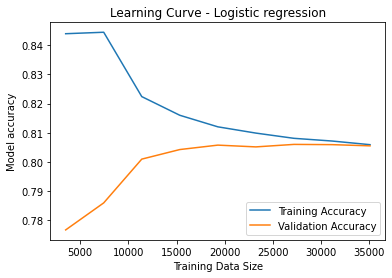

In [216]:
train_sizes, train_scores, test_scores = learning_curve(logreg, X_scaled, y, cv=30, train_sizes = np.linspace(0.1, 1.0, 9),random_state = 40)

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean, label='Training Accuracy')
plt.plot(train_sizes,test_mean, label='Validation Accuracy')
plt.title('Learning Curve - Logistic regression')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.legend(loc='lower right')
plt.show()

both the training and testing accuracy are very close, at around 0.8. which indicates that the model is not over-fitting the data and it is generalizing well to new data. additionaly, since the accuracy is around 0.8 which is considred to the low side, the model is likely to be underfitting

<AxesSubplot:>

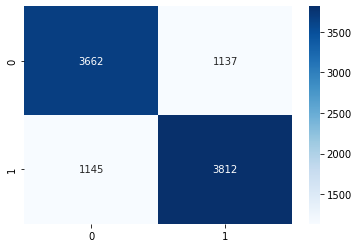

In [217]:
cm = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

The confusion matrix shows:
- True Negative is 3662
- True Positive is 3812
- False Positives is 1137
- False Negatives is 1145

The False negative and false positive are very close to each other, which means that the model is predicting as many "wrong" canceled as "wrong" non-canceled

---

**Logistic regression final accuracy: 79.88%**


---
**Decision trees Model**

In [218]:
#reset the X and y sets
X = data.drop('booking_status', axis = 1)

#The Goal (prediction)
y = data['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [219]:
dt = DecisionTreeClassifier(random_state=40)

dt.fit(X_train, y_train)

#test
y_pred = dt.predict(X_test)


#the accurecy
print("Accuracy of the Decision Tree predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Decision Tree predictor is:0.8624396967608546


Let's again start by scaling the data.

In [220]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#test the accuracy of the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)


dt = DecisionTreeClassifier(random_state=40)

dt.fit(X_train, y_train)

#test
y_pred = dt.predict(X_test)


#the accurecy
print("Accuracy of the Decision Tree predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Decision Tree predictor is:0.8621640248104755


The diffrence is small (0.0002), the higher accuracy is from the non scaled data.

Now, lets try to do feature selection on the original data

In [221]:
print("The data set Originaly contains " + str(X.shape[1]) + " dimensions.")

clf = DecisionTreeClassifier(random_state=40)
clf.fit(X, y)

trans = SelectFromModel(clf, threshold='median')
X_trans = trans.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=4)


print("now the data set contains " + str(X_trans.shape[1]) + " dimensions.")

The data set Originaly contains 17 dimensions.
now the data set contains 9 dimensions.


In [222]:
dt = DecisionTreeClassifier(random_state=40)

dt.fit(X_train, y_train)

#test
y_pred = dt.predict(X_test)


#the accurecy
print("Accuracy of the Decision Tree predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Decision Tree predictor is:0.8567884217780841


The accuracy went down by about 0.005 after doing feature selection.

Next, let's do PCA on the original data

In [223]:
pca = PCA(n_components=2, random_state=40)

# Fit and Apply dimensionality reduction on X
Z = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=4)

dt = DecisionTreeClassifier(random_state=40)

dt.fit(X_train, y_train)

#test
y_pred = dt.predict(X_test)


#the accurecy
print("Accuracy of the Decision Tree predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Decision Tree predictor is:0.7852515506547209


The Accurecy went down even more.

Next is Oversampling

In [224]:
oversampler = RandomOverSampler(random_state=40)

X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [225]:
dt = DecisionTreeClassifier(random_state=40)

dt.fit(X_train, y_train)

#test
y_pred = dt.predict(X_test)


#the accurecy
print("Accuracy of the Decision Tree predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Decision Tree predictor is:0.9178966789667896


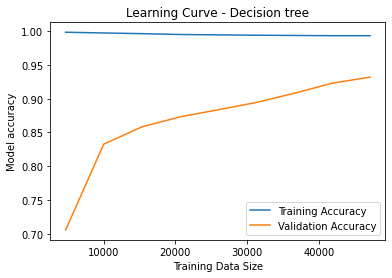

In [226]:
train_sizes, train_scores, test_scores = learning_curve(dt, X, y, cv=30, train_sizes = np.linspace(0.1, 1.0, 9),random_state = 40)

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean, label='Training Accuracy')
plt.plot(train_sizes,test_mean, label='Validation Accuracy')
plt.title('Learning Curve - Decision tree')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.legend(loc='lower right')
plt.show()

The learning curve shows that the model might be overfitting since the training accuracy stayed very close to 1. which indicates that the model is learning the noise in the data rather than ignoring them.

<AxesSubplot:>

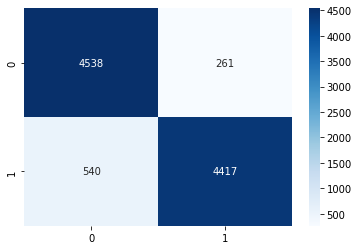

In [227]:
cm = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')


the confusion matrix is showing:
- True Negative is 4538
- True Positive is 4417
- False Positives is 261
- False Negatives is 540

this means that the model is more likely to wrongfuly predict the reservations that will be Canceled (predict them as non-canceled) rather than the ones that will not be canceled (predicting them as canceled). (because the False Positives is less than the False Negative)

---


**Decision tree Final Accuracy is 91.78%**

---

**Naive Bayes**

In [228]:
#reset the X and y sets
X = data.drop('booking_status', axis = 1)

#The Goal (prediction)
y = data['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [229]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy of the Naive Bayes predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Naive Bayes predictor is:0.4022053756030324


Scale the data

In [230]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#test the accuracy of the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)


gnb = GaussianNB()

gnb.fit(X_train, y_train)

#test
y_pred = gnb.predict(X_test)


#the accurecy
print("Accuracy of the Decision Tree predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Decision Tree predictor is:0.40206753962784286


the accuracy decreased, as a result, i will be using the original data.

Next, feature selection

In [231]:
print("The data set Originaly contains " + str(X.shape[1]) + " dimensions.")

clf = DecisionTreeClassifier(random_state=40)
clf.fit(X, y)

trans = SelectFromModel(clf, threshold='median')
X_trans = trans.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=4)


print("now the data set contains " + str(X_trans.shape[1]) + " dimensions.")

The data set Originaly contains 17 dimensions.
now the data set contains 9 dimensions.


In [232]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

#test
y_pred = gnb.predict(X_test)

#the accurecy
print("Accuracy of the Decision Tree predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Decision Tree predictor is:0.7666436940041351


The accuracy went up quite a lot.

Now, we will try PCA to see if it will do better.

In [233]:
pca = PCA(n_components=2, random_state=40)

# Fit and Apply dimensionality reduction on X
Z = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=4)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

#test
y_pred = gnb.predict(X_test)


#the accurecy
print("Accuracy of the Decision Tree predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Decision Tree predictor is:0.7587870434183321


feature Selection did better. so, i will be using that moving forward.

Next, oversampling

In [234]:
clf = DecisionTreeClassifier(random_state=40)
clf.fit(X, y)

trans = SelectFromModel(clf, threshold='median')
X_trans = trans.fit_transform(X, y)

oversampler = RandomOverSampler(random_state=40)

X, y = oversampler.fit_resample(X_trans, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [235]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

#test
y_pred = gnb.predict(X_test)

#the accurecy
print("Accuracy of the Decision Tree predictor is:" + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Decision Tree predictor is:0.7414924149241492


it did worst than feature selected alone, so i will be using feature selected data.

Now, lets plot the learning curve

In [236]:
clf = DecisionTreeClassifier(random_state=40)
clf.fit(X, y)

trans = SelectFromModel(clf, threshold='median')
X_trans = trans.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=4)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

#test
y_pred = gnb.predict(X_test)

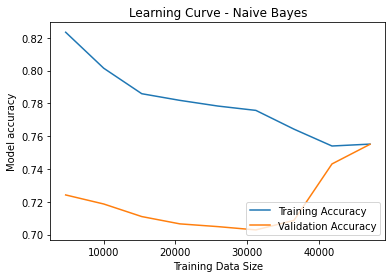

In [237]:
train_sizes, train_scores, test_scores = learning_curve(gnb, X_trans, y, cv=30, train_sizes = np.linspace(0.1, 1.0, 9),random_state = 40)

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean, label='Training Accuracy')
plt.plot(train_sizes,test_mean, label='Validation Accuracy')
plt.title('Learning Curve - Naive Bayes')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.legend(loc='lower right')
plt.show()

both the training and testing accuracy are very close, at around 0.76. which indicates that the model does seem to be underfitting since the accuracy is low.

<AxesSubplot:>

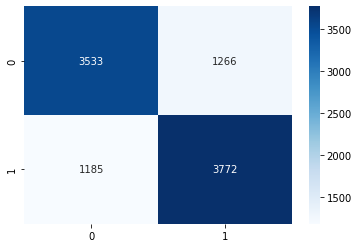

In [238]:
cm = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

The confusion matrix shows:
- True Negative is 3533
- True Positive is 3772
- False Positives is 1266
- False Negatives is 1185

The False negative and false positive are very close to each other, which means that the model is predicting as many "wrong" canceled as "wrong" non-canceled

---

**Naive Bayes final accuracy: 76,66%**




---





**Conclusion**

in our analysis, we tested with 4 diffrent models:


1.   KNN 
2.   Logistic Regresion
3.   Decision tree
4.   Naive Bayes

And the following was done in each:


**KNN model:** i started by testing the model on the original data to determine the best k to choose. the accuracy kept jumping around as k was changing, but the best k was equal to 1 so it was used for the entire modle. then i tried cross validation, but it produces a similier (slightly less) results as train-test split did. i ended up choosing to continue with train-test split for all models. then i scalled the data, and tested it's accuracy. the accuracy was better than the original data. i followed by doing feature selection and PCA on the scaled data to see if the accuracy will improve. Both of them turned out to do worst than the scaled data. as a result i used the scaled data to oversample the minority class and tested again. And the accurace of the oversampled data turned out to also be better. So, i finished up by analyzing the results of the scaled oversampled data.


**Logistic Regresion model:** i started by testing the model on the original data. after that i followed by testing it with diffrent maximum number of iterations and then scalling the data. in both cases, the accuracy improved, but the scalling improved it more. So, i followed up by doing feature selection and PCA on the scaled data to see which will preform better. Both of them, turned out to do worst than the scaled data. as a result i used the scaled data to oversample the minority class and tested again. And the accurace of the oversampled data turned out to also be worst. So, i finished up by analyzing the results of the scaled data.



---

**Decision tree model:** i started by testing the model on the original data. after that i followed by scalling the data and testing again. However, the accuracy did not improve. So, i followed up by doing feature selection and PCA on the original data to see which will preform better. Both of them, turned out to do worst than the original data. as a result i used the original data to oversample the minority class and tested again. And the accurace of the oversampled data turned out to be better. So, i finished up by analyzing the results of the oversampled data.

---

**Naive Bayes model:** i started by testing the model on the original data. Then followed by scalling the data and testing again. However, the accuracy did not improve. So, i followed up by doing feature selection and PCA on the original data to see which will preform better. the feature selection data turned out to be better. as a result i used the feature slected data to oversample the minority class and tested again. however, the accuracy went. so i took the accuracy of the feature selected data to be the best accuracy, and analyzed the results.

**Results:** out of all 4, the Decision tree model preformed the best with a 91.78% accuracy. the KNN model had a close accurace of 90.93%, while both Naive Bayes and Logistic Regresion models had below 80% accuracy.


the learning curve for both KNN and Decision tree models indicate that there might be over-fitting happening because the training accuracy curve stays very close to 1. while the Naive Bayes and logistic regresion models on the other hand, appear to be underfitting because the accuracy is low.

the confusion metrix show that both NN and Decision tree models are producing the correct result most of the time. however, they both miscotigorize the
non-canceled reservations more than the canceled. which is worst than the other way around because if these models were used, there would be some people showing for their reservation but there would not be any rooms avaliable for them. while both the Naive Bayes and logistic regresion models appear to miscotogrize a lot of reservations, but the miscotogroziation appeears to be equally distributed between both types.

**The Best Model Is The  Decision tree Model**

Prompts used in GPT:

- i have 36275 observations, with around 11.5 thousand to 12 thousand have the booking_status as canceled, while the remaining have it as not canceled. would that size diffrence cause a problem while training the data

- how can i oversample in python

- does it make a diffrence if i do PCA and feature selection before or after oversampling


